<a href="https://colab.research.google.com/github/YATHAMSHAVALI/-Next24tech/blob/main/Road_Lane_Line_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-colab
!pip install opencv-python
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow


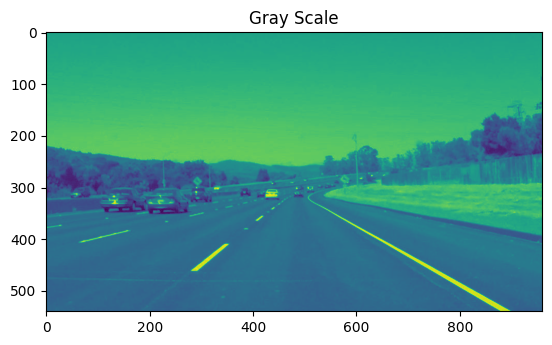

In [ ]:
#Reading color image
img = cv2.imread("/content/1_tAYhzModmkMq3xRC3MaVQA.jpg")

#converting color image to grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title("Gray Scale")
plt.show()

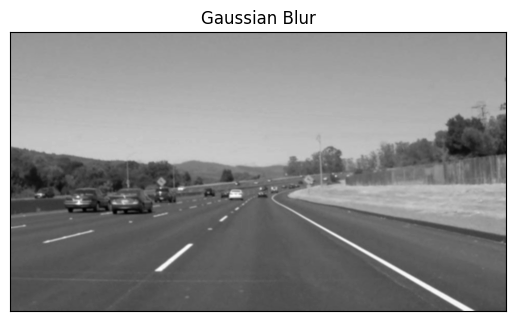

In [ ]:
cv2.blur = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(cv2.blur , cmap = "gray")
plt.title("Gaussian Blur"), plt.xticks([]), plt.yticks([])
plt.show()

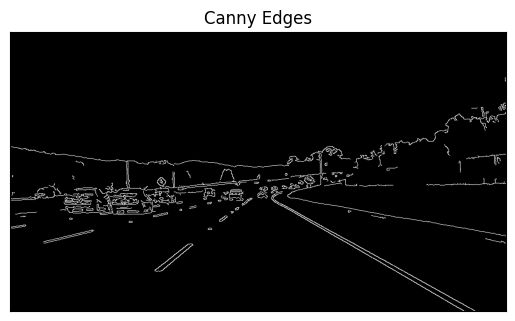

In [ ]:
cv2.edges = cv2.Canny(img, 100, 200)
plt.imshow(cv2.edges, cmap = "gray")
plt.title("Canny Edges"), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_yellow = np.array([20, 100, 100], dtype = "uint8")
upper_yellow = np.array([30, 255, 255], dtype = "uint8")

mask_yellow = cv2.inRange(img_hsv, lower_yellow, upper_yellow)
mask_white = cv2.inRange(gray, 200, 255)
mask_yw = cv2.bitwise_or(mask_white, mask_yellow)
mask_yw_image = cv2.bitwise_and(gray, mask_yw)



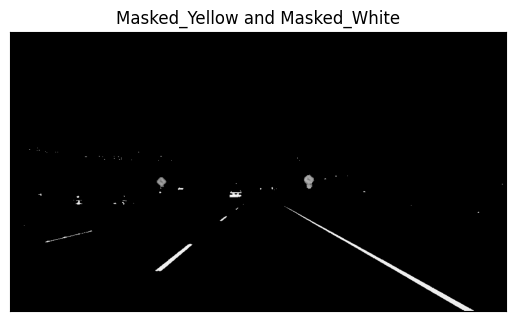

In [ ]:
plt.imshow(mask_yw_image, cmap = "gray")
plt.title("Masked_Yellow and Masked_White"), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
def region(image):
    height, width = image.shape[:2]

    triangle = np.array([
                       [(100, height), (475, 325), (width, height)]
                       ])

    mask = np.zeros_like(image)

    cv2.fillPoly(mask, triangle, 255)

    mask = cv2.bitwise_and(image, mask)

    return mask

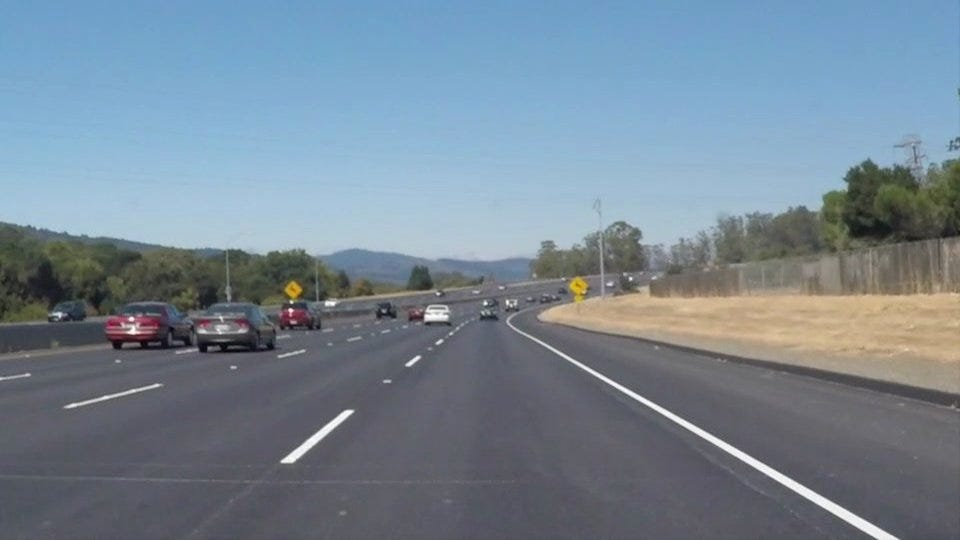

In [ ]:
image = cv2.imread('/content/1_tAYhzModmkMq3xRC3MaVQA.jpg')

mask = region(image)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
def region(image):
    height, width = image.shape[:2]


    triangle = np.array([
                       [(100, height), (475, 325), (width, height)]
                       ])

    mask = np.zeros_like(image)


    cv2.fillPoly(mask, triangle, 255)

    mask_image = cv2.bitwise_and(image, mask)

    return mask_image

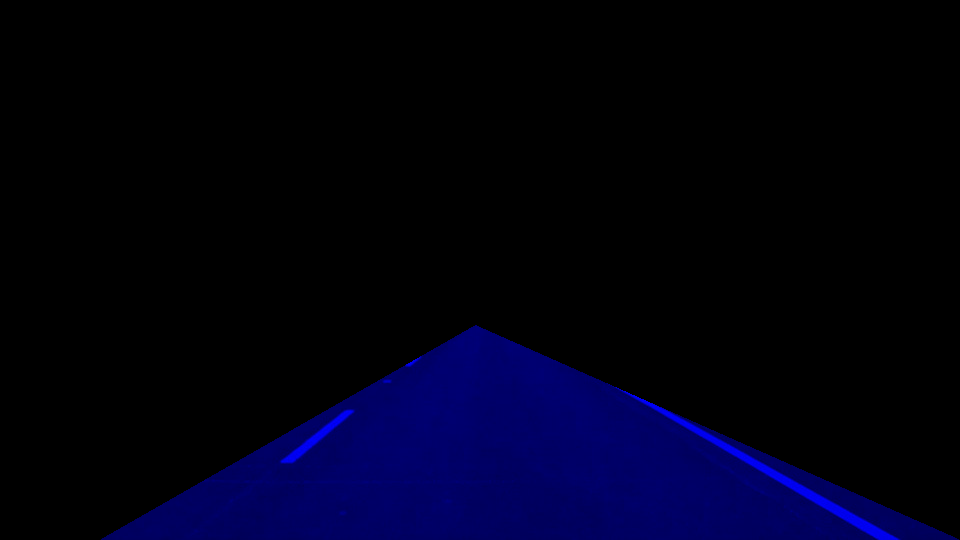

In [ ]:
image = cv2.imread('/content/1_tAYhzModmkMq3xRC3MaVQA.jpg')

mask_image = region(image)

cv2_imshow(mask_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def region(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    height, width = image.shape
    triangle = np.array([
                       [(100, height), (475, 325),(width,height)]
                       ])
    mask = np.zeros_like(image)

    cv2.fillConvexPoly(mask, triangle, 255)
    mask = cv2.bitwise_and(image, mask)
    return mask



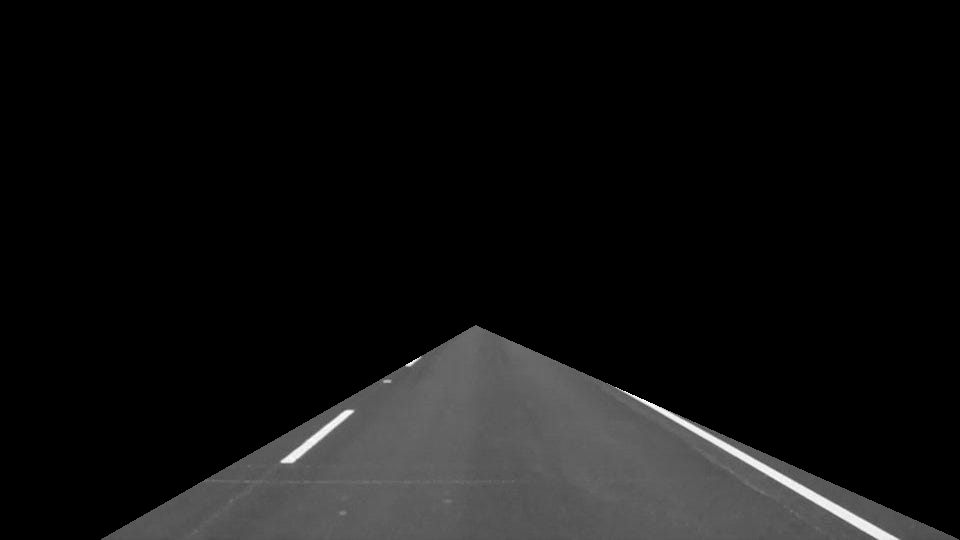

In [ ]:
image = cv2.imread('/content/1_tAYhzModmkMq3xRC3MaVQA.jpg')

mask = region(image)

cv2_imshow(mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def region(image):
    height, width = image.shape[:2]
    triangle = np.array([
        [(100, height), (475, 325), (width, height)]
    ])


    mask = np.zeros_like(image)


    cv2.fillPoly(mask, triangle, 255)


    masked_image = cv2.bitwise_and(image, mask)


    gray_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)


    edges = cv2.Canny(gray_image, 50, 150)

    edge_mask = np.zeros_like(edges)


    edge_mask[edges != 0] = 255


    final_image = cv2.bitwise_and(image, image, mask=edge_mask)

    return final_image

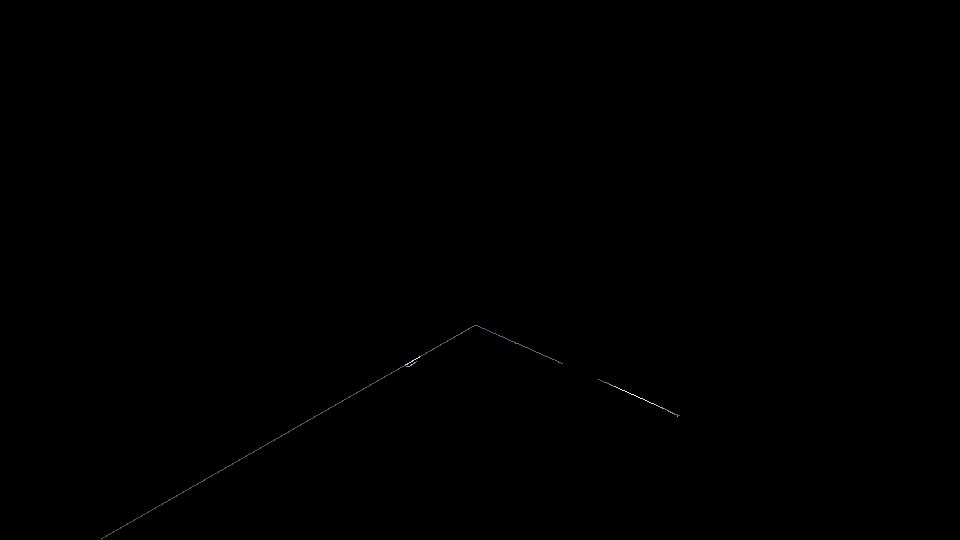

In [ ]:
image = cv2.imread('/content/1_tAYhzModmkMq3xRC3MaVQA.jpg')

edges_image = region(image)

cv2_imshow(edges_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


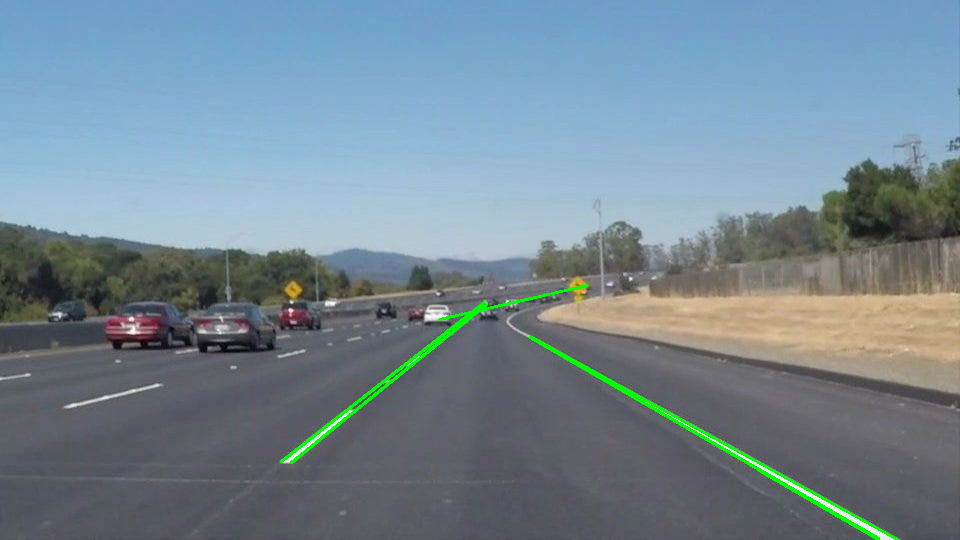

In [ ]:
isolated = cv2.Canny(mask_yw_image, 50, 150)
lines = cv2.HoughLinesP(isolated, rho=2, theta=np.pi/180, threshold=100,  minLineLength=100, maxLineGap=100)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def average(image, lines):
    left = []
    right = []
    for line in lines:
        print(line)
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        y_int = parameters[1]
        if slope < 0:
            left.append((slope, y_int))
        else:
            right.append((slope, y_int))
    return left, right

In [ ]:
def make_points(image, average):
  slope, y_int = average
  y1 = image.shape[0]
  y2 = int(y1 * (3/5))
  x1 = int((y1 - y_int) // slope)
  x2 = int((y2 - y_int) // slope)
  return np.array([x1, y1, x2, y2])


In [ ]:
left, right = average(isolated, lines)
right_avg = np.average(right, axis=0)
left_avg = np.average(left, axis=0)
left_line = make_points(isolated, left_avg)
right_line = make_points(isolated, right_avg)
np.array([left_line, right_line])

[[530 336 897 539]]
[[759 470 878 539]]
[[530 337 878 538]]
[[281 461 484 302]]
[[439 319 587 285]]
[[291 462 486 304]]


array([[ 98, 540, 453, 324],
       [886, 540, 507, 324]])

In [ ]:
def display_lines(image, lines):
 lines_image = np.zeros_like(image)
 if lines is not None:
   for line in lines:
     x1, y1, x2, y2 = line
     cv2.line(lines_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
 return lines_image

In [ ]:
copy = image.copy()

lines_to_display = np.array([left_line, right_line])

black_lines = display_lines(copy, lines_to_display)

lanes = cv2.addWeighted(copy, 0.8, black_lines, 1, 1)

[[530 336 897 539]]
[[759 470 878 539]]
[[530 337 878 538]]
[[281 461 484 302]]
[[439 319 587 285]]
[[291 462 486 304]]


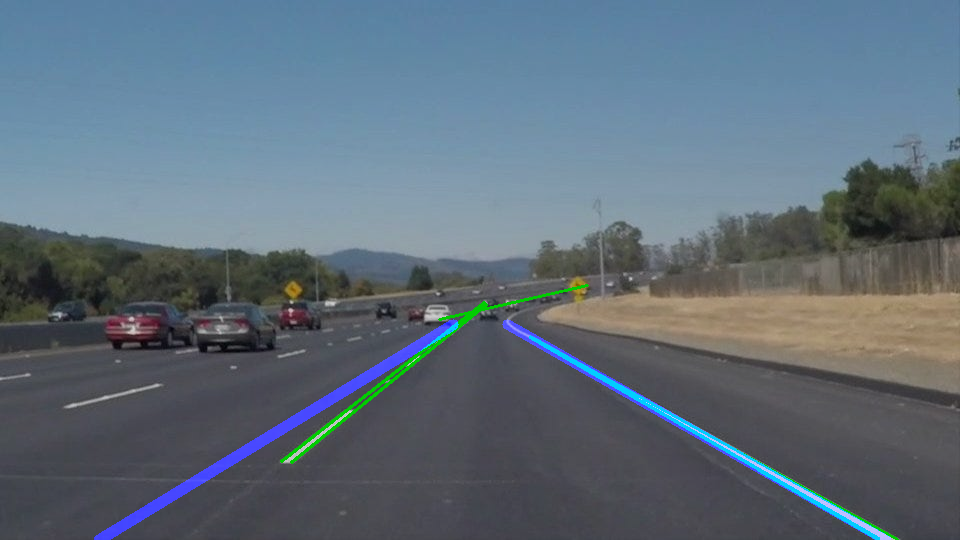

-1

In [ ]:
def gaussian(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def canny(image, low_threshold, high_threshold):
    return cv2.Canny(image, low_threshold, high_threshold)

copy = np.copy(image)
gray_image = cv2.cvtColor(copy, cv2.COLOR_BGR2GRAY)
gaus = gaussian(gray_image)
edges = canny(gaus,50,150)
lines = cv2.HoughLinesP(isolated, 2, np.pi/180, 100, minLineLength=100, maxLineGap=100)
averaged_lines = average(copy, lines)
black_lines = display_lines(copy, lines_to_display)
lanes = cv2.addWeighted(copy, 0.8, black_lines, 1, 1)
cv2_imshow(lanes)
cv2.waitKey(0)